# Multi-Block Local Binary Pattern for texture classification

This example shows how to compute multi-block local binary pattern (MB-LBP) features as well as how to visualize them.

The features are calculated similarly to local binary patterns (LBPs), except that summed blocks are used instead of individual pixel values.

MB-LBP is an extension of LBP that can be computed on multiple scales in constant time using the integral image. 9 equally-sized rectangles are used to compute a feature. For each rectangle, the sum of the pixel intensities is computed. Comparisons of these sums to that of the central rectangle determine the feature, similarly to LBP (See LBP).

First, we generate an image to illustrate the functioning of MB-LBP: consider a (9, 9) rectangle and divide it into (3, 3) block, upon which we then apply MB-LBP.

In [3]:
%matplotlib notebook

from __future__ import print_function
from skimage.feature import multiblock_lbp
import numpy as np
from numpy.testing import assert_equal
from skimage.transform import integral_image

# Create test matrix where first and fifth rectangles starting
# from top left clockwise have greater value than the central one.
test_img = np.zeros((9, 9), dtype='uint8')
test_img[3:6, 3:6] = 1
test_img[:3, :3] = 50
test_img[6:, 6:] = 50

# First and fifth bits should be filled. This correct value will
#  be compared to the computed one.
correct_answer = 0b10001000

int_img = integral_image(test_img)

lbp_code = multiblock_lbp(int_img, 0, 0, 3, 3)

assert_equal(correct_answer, lbp_code)

Now let’s apply the operator to a real image and see how the visualization works.

<IPython.core.display.Javascript object>


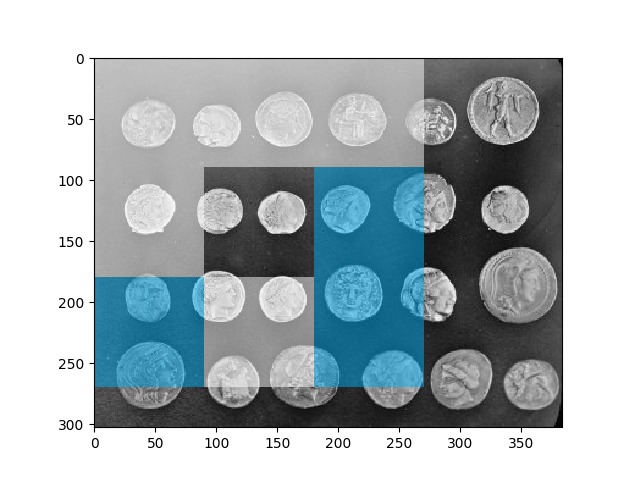

In [4]:
from skimage import data
from matplotlib import pyplot as plt
from skimage.feature import draw_multiblock_lbp

test_img = data.coins()

int_img = integral_image(test_img)

lbp_code = multiblock_lbp(int_img, 0, 0, 90, 90)

img = draw_multiblock_lbp(test_img, 0, 0, 90, 90,
                          lbp_code=lbp_code, alpha=0.5)


plt.imshow(img, interpolation='nearest', a)

plt.show()